In [1]:
#inks to fallow :

# 1> https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

# i am fallowing link 2 for this case 

# 2> https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

# 3>https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/

# 4>https://gist.github.com/lrhache/7686903

# 5>https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/2-Exploratory-Data-Analysis.ipynb

In [2]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
print (nltk.download('stopwords'))

True


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/siddharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_1_to_11.csv')
data_1=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_2_to_10.csv')
data_2=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_11_to_19.csv')
data_3=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_20_to_30.csv')
data_4=pd.read_csv('file:///home/siddharth/python scraping/tcs_ambiant_box/tcs_with_rating_rev_31_to_37.csv')

In [4]:
frames = [data, data_1, data_2,data_3,data_4]


result = pd.concat(frames,ignore_index=True)

In [5]:
result 

,Unnamed: 0,date,tital,user,dislike,like,rating,page_index
0,0,posted on 12 Jun 2020,Senior Process Associate in Bangalore,Anonymous · Banking Division,Dislikes I will be there for 5 and half years ...,"Likes No proper shift timings,I work for 18 ho...",3.0,2
1,1,posted on 04 Sep 2020,Assistant Consultant for 4.4 years in Montevideo,Arjun Mehta · Current Employee · Information ...,"Dislikes Nothing, TCS is global brand which ne...",Likes TCS as a company is taking great efforts...,5.0,2
2,2,posted on 26 Jul 2019,Associate Consultant in Bangalore,Anonymous · EIS Division,"Dislikes 1. First of all, everybody in TCS are...",Likes You can draw salary without doing any wo...,1.0,2
3,3,posted on 10 Sep 2020,Java Developer in Gurgaon,Anonymous · Banking & Finance Division,Dislikes Because don't have parmanent position...,Likes I was work on 3 party payroll we know th...,5.0,2
4,4,posted on 28 Jul 2020,Java Developer in TCS Olympus,Anonymous · Information Technology Division,Dislikes No support. I sent email to HR about ...,Likes No support. I sent email to HR about my ...,1.0,2
...,...,...,...,...,...,...,...,...
444,65,posted on 29 Jan 2020,It Analyst in Kolkata,Anonymous · bfs Division,"Dislikes 1.Poor Work Life balance, specially i...",Likes Job Security.,2.0,37
445,66,posted on 07 Jun 2020,Associate in Pune,Anonymous · Us Mortgage Division,Dislikes No opportunity to join again,Likes This is Ganesh currently I am not a empl...,5.0,37
446,67,posted on 04 Jun 2020,"Office Boy for 4.9 years in Kolkata, Rajarhat",Anonymous · Former Employee · Office boy Divi...,Dislikes Admin pressures,Likes I am not working right now 😔,5.0,37
447,68,posted on 05 Jun 2020,Senior Associate in Pune Bhosari,Anonymous · Banking & Finance Division,Dislikes nothing,Likes traning language is very soft.no politic...,4.0,37


In [6]:
data1=result 

In [7]:
data1.insert(7, "clean_round_1","")


In [8]:
data1

,Unnamed: 0,date,tital,user,dislike,like,rating,clean_round_1,page_index
0,0,posted on 12 Jun 2020,Senior Process Associate in Bangalore,Anonymous · Banking Division,Dislikes I will be there for 5 and half years ...,"Likes No proper shift timings,I work for 18 ho...",3.0,,2
1,1,posted on 04 Sep 2020,Assistant Consultant for 4.4 years in Montevideo,Arjun Mehta · Current Employee · Information ...,"Dislikes Nothing, TCS is global brand which ne...",Likes TCS as a company is taking great efforts...,5.0,,2
2,2,posted on 26 Jul 2019,Associate Consultant in Bangalore,Anonymous · EIS Division,"Dislikes 1. First of all, everybody in TCS are...",Likes You can draw salary without doing any wo...,1.0,,2
3,3,posted on 10 Sep 2020,Java Developer in Gurgaon,Anonymous · Banking & Finance Division,Dislikes Because don't have parmanent position...,Likes I was work on 3 party payroll we know th...,5.0,,2
4,4,posted on 28 Jul 2020,Java Developer in TCS Olympus,Anonymous · Information Technology Division,Dislikes No support. I sent email to HR about ...,Likes No support. I sent email to HR about my ...,1.0,,2
...,...,...,...,...,...,...,...,...,...
444,65,posted on 29 Jan 2020,It Analyst in Kolkata,Anonymous · bfs Division,"Dislikes 1.Poor Work Life balance, specially i...",Likes Job Security.,2.0,,37
445,66,posted on 07 Jun 2020,Associate in Pune,Anonymous · Us Mortgage Division,Dislikes No opportunity to join again,Likes This is Ganesh currently I am not a empl...,5.0,,37
446,67,posted on 04 Jun 2020,"Office Boy for 4.9 years in Kolkata, Rajarhat",Anonymous · Former Employee · Office boy Divi...,Dislikes Admin pressures,Likes I am not working right now 😔,5.0,,37
447,68,posted on 05 Jun 2020,Senior Associate in Pune Bhosari,Anonymous · Banking & Finance Division,Dislikes nothing,Likes traning language is very soft.no politic...,4.0,,37


In [9]:
import re
import string

def clean_text_round1(text):
    #print (text)
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
   # print(text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
   # print(text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text=re.sub('\r', '', text)
    #removing like from the first
    text = text.split(' ', 1)[1]
    print(text)
    return text

In [10]:
for i in range(0,len(data1)):
    data1.clean_round_1[i]=clean_text_round1(str(data1.like[i]))

no proper shift timingsi work for  hours a day while starting my career pay scale they dont even bother what u gettingwhatever happens you have to worki went to delhi tcs for deputation on  feb monththe allowance for deputation was given on jan  to get that amount no one help mei face a lot of struggleand  if i raise an amount it will be credited and the manager rejected that and debited from next month salary so these things are happensthere is no work life balance being a fresher it is ok to work therebut have to face lot of politicsread more
tcs as a company is taking great efforts to help society along with taking care of associates and family tcs is providing job security to its employees and at the same time tcs is fully dedicated to its customer satisfaction and working very hard to provide all the services to customers feeling good while working at tcs 
you can draw salary without doing any work and even without going to office a single day in a month
i was work on  party payro

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
data1.clean_round_1[0]

'no proper shift timingsi work for  hours a day while starting my career pay scale they dont even bother what u gettingwhatever happens you have to worki went to delhi tcs for deputation on  feb monththe allowance for deputation was given on jan  to get that amount no one help mei face a lot of struggleand  if i raise an amount it will be credited and the manager rejected that and debited from next month salary so these things are happensthere is no work life balance being a fresher it is ok to work therebut have to face lot of politicsread more'

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [13]:
data1["clean_round_1"]=data1["clean_round_1"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [14]:
data1["clean_round_1"]

0      proper shift timingsi work hours day starting ...
1      tcs company taking great efforts help society ...
2      draw salary without work even without going of...
3      work party payroll know company environment fi...
4      support sent email hr manager asking go office...
                             ...                        
444                                         job security
445    ganesh currently employee tcs still love exper...
446                                      working right 😔
447    traning language softno politics workingjob al...
448    company better monthly payments benefits etc b...
Name: clean_round_1, Length: 449, dtype: object

In [15]:
data1

,Unnamed: 0,date,tital,user,dislike,like,rating,clean_round_1,page_index
0,0,posted on 12 Jun 2020,Senior Process Associate in Bangalore,Anonymous · Banking Division,Dislikes I will be there for 5 and half years ...,"Likes No proper shift timings,I work for 18 ho...",3.0,proper shift timingsi work hours day starting ...,2
1,1,posted on 04 Sep 2020,Assistant Consultant for 4.4 years in Montevideo,Arjun Mehta · Current Employee · Information ...,"Dislikes Nothing, TCS is global brand which ne...",Likes TCS as a company is taking great efforts...,5.0,tcs company taking great efforts help society ...,2
2,2,posted on 26 Jul 2019,Associate Consultant in Bangalore,Anonymous · EIS Division,"Dislikes 1. First of all, everybody in TCS are...",Likes You can draw salary without doing any wo...,1.0,draw salary without work even without going of...,2
3,3,posted on 10 Sep 2020,Java Developer in Gurgaon,Anonymous · Banking & Finance Division,Dislikes Because don't have parmanent position...,Likes I was work on 3 party payroll we know th...,5.0,work party payroll know company environment fi...,2
4,4,posted on 28 Jul 2020,Java Developer in TCS Olympus,Anonymous · Information Technology Division,Dislikes No support. I sent email to HR about ...,Likes No support. I sent email to HR about my ...,1.0,support sent email hr manager asking go office...,2
...,...,...,...,...,...,...,...,...,...
444,65,posted on 29 Jan 2020,It Analyst in Kolkata,Anonymous · bfs Division,"Dislikes 1.Poor Work Life balance, specially i...",Likes Job Security.,2.0,job security,37
445,66,posted on 07 Jun 2020,Associate in Pune,Anonymous · Us Mortgage Division,Dislikes No opportunity to join again,Likes This is Ganesh currently I am not a empl...,5.0,ganesh currently employee tcs still love exper...,37
446,67,posted on 04 Jun 2020,"Office Boy for 4.9 years in Kolkata, Rajarhat",Anonymous · Former Employee · Office boy Divi...,Dislikes Admin pressures,Likes I am not working right now 😔,5.0,working right 😔,37
447,68,posted on 05 Jun 2020,Senior Associate in Pune Bhosari,Anonymous · Banking & Finance Division,Dislikes nothing,Likes traning language is very soft.no politic...,4.0,traning language softno politics workingjob al...,37


In [17]:
data1.insert(8, "without_sw_and_punctuation_numbers", "")

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
df = pd.DataFrame()
df.insert(0,"without_sw_and_punctuation_numbers", "") 
for i in range(0,len(data1.clean_round_1)):
    text = data1.clean_round_1[i]
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    data1.without_sw_and_punctuation_numbers[i]=tokens_without_sw

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
data1.without_sw_and_punctuation_numbers[0]

['proper',
 'shift',
 'timingsi',
 'work',
 'hours',
 'day',
 'starting',
 'career',
 'pay',
 'scale',
 'dont',
 'even',
 'bother',
 'gettingwhatever',
 'happens',
 'worki',
 'went',
 'delhi',
 'tcs',
 'deputation',
 'feb',
 'monththe',
 'allowance',
 'deputation',
 'given',
 'jan',
 'get',
 'amount',
 'help',
 'lot',
 'struggleand',
 'raise',
 'amount',
 'credited',
 'manager',
 'rejected',
 'debited',
 'next',
 'month',
 'salary',
 'things',
 'happensthere',
 'work',
 'life',
 'balance',
 'fresher',
 'ok',
 'work',
 'therebut',
 'lot',
 'politicsread']

In [20]:
from collections import Counter 
#Counter = ''
for i in data1.clean_round_1:
    #print(i)
    # split() returns list of all the words in the string 
    split_it = i.split() 
    # Pass the split_it list to instance of Counter class. 
    #print(Counter)
    Counter_1 = Counter(split_it) 
    #print(Counter)
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur = Counter_1.most_common(4) 
    print(most_occur) 

[('work', 3), ('deputation', 2), ('amount', 2), ('face', 2)]
[('tcs', 4), ('taking', 2), ('working', 2), ('company', 1)]
[('without', 2), ('draw', 1), ('salary', 1), ('work', 1)]
[('work', 2), ('company', 2), ('party', 1), ('payroll', 1)]
[('work', 4), ('support', 2), ('hr', 2), ('manager', 2)]
[('tcs', 2), ('covid', 2), ('believe', 1), ('find', 1)]
[('tcs', 4), ('working', 4), ('good', 3), ('work', 2)]
[('work', 2), ('need', 2), ('job', 2), ('might', 2)]
[('good', 1), ('support', 1), ('management', 1)]
[('company', 2), ('carrying', 1), ('provided', 1), ('laptop', 1)]
[('good', 5), ('project', 3), ('one', 3), ('tcs', 2)]
[('work', 1), ('life', 1), ('balance', 1), ('company', 1)]
[('job', 2), ('good', 2), ('work', 1), ('environment', 1)]
[('good', 2), ('work', 1), ('environment', 1), ('culture', 1)]
[('lot', 2), ('change', 2), ('job', 1), ('security', 1)]
[('good', 3), ('learning', 2), ('like', 2), ('location', 2)]
[('work', 2), ('tcs', 1), ('started', 1), ('precautionary', 1)]
[('compa

In [24]:
#bag of words
# Python3 code for preprocessing text 
import nltk 
import re 
import numpy as np 
  
# execute the text here as : 
# text = """ # place text here  """ 
dataset =  data1.clean_round_1
for i in range(len(dataset)): 
    dataset[i] = dataset[i].lower() 
    dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 


/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [25]:

# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1


In [26]:

import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
print(freq_words)

['tcs', 'work', 'good', 'company', 'job', 'security', 'working', 'employees', 'home', 'like', 'salary', 'support', 'also', 'environment', 'covid', 'life', 'project', 'one', 'time', 'balance', 'culture', 'situation', 'people', 'employee', 'career', 'get', 'team', 'learning', 'best', 'lot', 'provided', 'pandemic', 'office', 'us', 'thing', 'experience', 'management', 'different', 'growth', 'policies', 'opportunities', 'part', 'providing', 'great', 'new', 'every', 'well', 'much', 'projects', 'got', 'tata', 'health', 'opportunity', 'things', 'companies', 'even', 'location', 'place', 'help', 'always', 'still', 'years', 'say', 'associates', 'really', 'facilities', 'read', 'training', 'overall', 'dont', 'family', 'organization', 'depends', 'teammates', 'supportive', 'better', 'given', 'due', 'want', 'happy', 'feel', 'care', 'know', 'hr', 'worked', 'hike', 'many', 'supporting', 'come', 'learn', 'proud', 'manager', 'benefits', 'excellent', 'development', 'lockdown', 'never', 'leave', 'would', 'g

In [27]:

X = [] 
for data in dataset: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 


In [28]:
X

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
import nltk

from nltk.tokenize import word_tokenize
reviews = data1.clean_round_1.str.cat(sep=' ')#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

1887


['tcs',
 'work',
 'good',
 'company',
 'job',
 'security',
 'working',
 'employees',
 'home',
 'like',
 'salary',
 'support',
 'also',
 'environment',
 'covid',
 'life',
 'project',
 'one',
 'time',
 'balance',
 'culture',
 'situation',
 'people',
 'employee',
 'career',
 'get',
 'team',
 'learning',
 'best',
 'lot',
 'provided',
 'pandemic',
 'office',
 'us',
 'thing',
 'experience',
 'management',
 'different',
 'growth',
 'policies',
 'opportunities',
 'part',
 'providing',
 'great',
 'new',
 'every',
 'well',
 'much',
 'projects',
 'got']

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

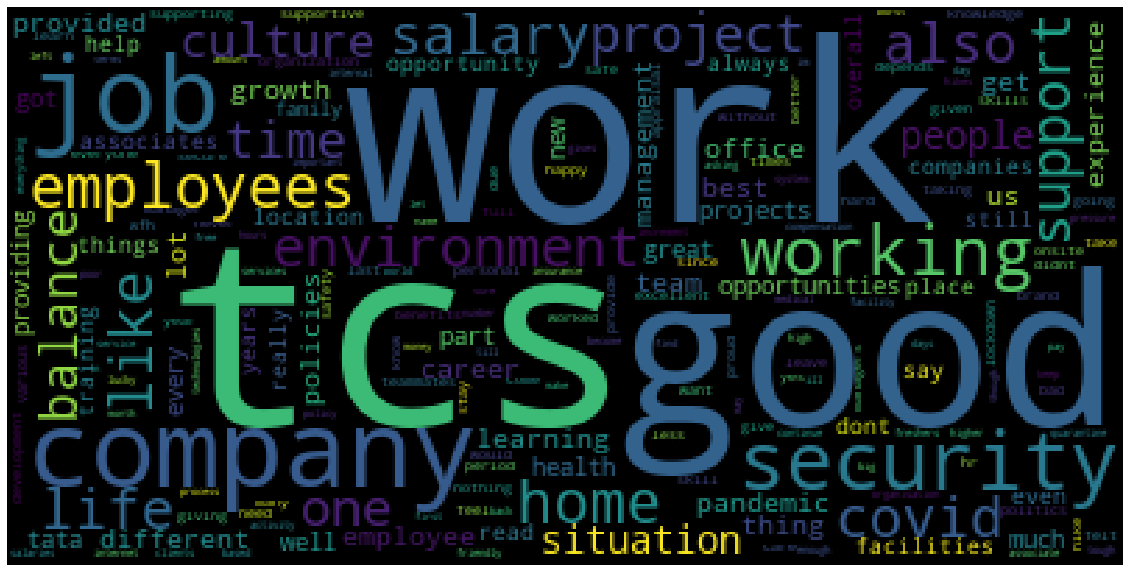

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [29]:
!pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /home/siddharth/anaconda3/lib/python3.7/site-packages (0.17.3)


In [35]:
#https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [36]:
data1['clean_round_1'].iplot(
    kind='hist',
    bins=50,
    xTitle='clean_round_1',
    linecolor='black',
    yTitle='page_index',
    title='Sentiment Polarity Distribution')

In [37]:
data1['clean_round_1'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [38]:
data1.insert(10, "rev_len_positive", "")

In [39]:
for i in range (0,len(data1)):
    print(len(data1.clean_round_1[i]),"",data1.clean_round_1[i])
    data1.rev_len_positive[i]=len(data1.clean_round_1[i])
    

376  proper shift timingsi work hours day starting career pay scale dont even bother u gettingwhatever happens worki went delhi tcs deputation feb monththe allowance deputation given jan get amount one help mei face lot struggleand raise amount credited manager rejected debited next month salary things happensthere work life balance fresher ok work therebut face lot politicsread
230  tcs company taking great efforts help society along taking care associates family tcs providing job security employees time tcs fully dedicated customer satisfaction working hard provide services customers feeling good working tcs
67  draw salary without work even without going office single day month
120  work party payroll know company environment fine work experience wish opening intcs join company good rules handle covid
288  support sent email hr manager asking go office work issue phone informed cant work home due full lock deliveries happening new phone shops open containment zone kasarwadawali hr d

In [40]:
data1

,Unnamed: 0,date,tital,user,dislike,like,rating,clean_round_1,without_sw_and_punctuation_numbers,page_index,rev_len_positive
0,0,posted on 12 Jun 2020,Senior Process Associate in Bangalore,Anonymous · Banking Division,Dislikes I will be there for 5 and half years ...,"Likes No proper shift timings,I work for 18 ho...",3.0,proper shift timingsi work hours day starting ...,"[proper, shift, timingsi, work, hours, day, st...",2,376
1,1,posted on 04 Sep 2020,Assistant Consultant for 4.4 years in Montevideo,Arjun Mehta · Current Employee · Information ...,"Dislikes Nothing, TCS is global brand which ne...",Likes TCS as a company is taking great efforts...,5.0,tcs company taking great efforts help society ...,"[tcs, company, taking, great, efforts, help, s...",2,230
2,2,posted on 26 Jul 2019,Associate Consultant in Bangalore,Anonymous · EIS Division,"Dislikes 1. First of all, everybody in TCS are...",Likes You can draw salary without doing any wo...,1.0,draw salary without work even without going of...,"[draw, salary, without, work, even, without, g...",2,67
3,3,posted on 10 Sep 2020,Java Developer in Gurgaon,Anonymous · Banking & Finance Division,Dislikes Because don't have parmanent position...,Likes I was work on 3 party payroll we know th...,5.0,work party payroll know company environment fi...,"[work, party, payroll, know, company, environm...",2,120
4,4,posted on 28 Jul 2020,Java Developer in TCS Olympus,Anonymous · Information Technology Division,Dislikes No support. I sent email to HR about ...,Likes No support. I sent email to HR about my ...,1.0,support sent email hr manager asking go office...,"[support, sent, email, hr, manager, asking, go...",2,288
...,...,...,...,...,...,...,...,...,...,...,...
444,65,posted on 29 Jan 2020,It Analyst in Kolkata,Anonymous · bfs Division,"Dislikes 1.Poor Work Life balance, specially i...",Likes Job Security.,2.0,job security,"[job, security]",37,12
445,66,posted on 07 Jun 2020,Associate in Pune,Anonymous · Us Mortgage Division,Dislikes No opportunity to join again,Likes This is Ganesh currently I am not a empl...,5.0,ganesh currently employee tcs still love exper...,"[ganesh, currently, employee, tcs, still, love...",37,57
446,67,posted on 04 Jun 2020,"Office Boy for 4.9 years in Kolkata, Rajarhat",Anonymous · Former Employee · Office boy Divi...,Dislikes Admin pressures,Likes I am not working right now 😔,5.0,working right,"[working, right, 😔]",37,14
447,68,posted on 05 Jun 2020,Senior Associate in Pune Bhosari,Anonymous · Banking & Finance Division,Dislikes nothing,Likes traning language is very soft.no politic...,4.0,traning language softno politics workingjob al...,"[traning, language, softno, politics, workingj...",37,55


In [41]:
data1['rev_len_positive'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [42]:
data1['tital'].iplot(
    kind='hist',
    bins=100,
    xTitle='tital',
    linecolor='black',
    yTitle='count',
    title='tital')

In [38]:
!pip install networkx

In [43]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [44]:
data1

,Unnamed: 0,date,tital,user,dislike,like,rating,clean_round_1,without_sw_and_punctuation_numbers,page_index,rev_len_positive
0,0,posted on 12 Jun 2020,Senior Process Associate in Bangalore,Anonymous · Banking Division,Dislikes I will be there for 5 and half years ...,"Likes No proper shift timings,I work for 18 ho...",3.0,proper shift timingsi work hours day starting ...,"[proper, shift, timingsi, work, hours, day, st...",2,376
1,1,posted on 04 Sep 2020,Assistant Consultant for 4.4 years in Montevideo,Arjun Mehta · Current Employee · Information ...,"Dislikes Nothing, TCS is global brand which ne...",Likes TCS as a company is taking great efforts...,5.0,tcs company taking great efforts help society ...,"[tcs, company, taking, great, efforts, help, s...",2,230
2,2,posted on 26 Jul 2019,Associate Consultant in Bangalore,Anonymous · EIS Division,"Dislikes 1. First of all, everybody in TCS are...",Likes You can draw salary without doing any wo...,1.0,draw salary without work even without going of...,"[draw, salary, without, work, even, without, g...",2,67
3,3,posted on 10 Sep 2020,Java Developer in Gurgaon,Anonymous · Banking & Finance Division,Dislikes Because don't have parmanent position...,Likes I was work on 3 party payroll we know th...,5.0,work party payroll know company environment fi...,"[work, party, payroll, know, company, environm...",2,120
4,4,posted on 28 Jul 2020,Java Developer in TCS Olympus,Anonymous · Information Technology Division,Dislikes No support. I sent email to HR about ...,Likes No support. I sent email to HR about my ...,1.0,support sent email hr manager asking go office...,"[support, sent, email, hr, manager, asking, go...",2,288
...,...,...,...,...,...,...,...,...,...,...,...
444,65,posted on 29 Jan 2020,It Analyst in Kolkata,Anonymous · bfs Division,"Dislikes 1.Poor Work Life balance, specially i...",Likes Job Security.,2.0,job security,"[job, security]",37,12
445,66,posted on 07 Jun 2020,Associate in Pune,Anonymous · Us Mortgage Division,Dislikes No opportunity to join again,Likes This is Ganesh currently I am not a empl...,5.0,ganesh currently employee tcs still love exper...,"[ganesh, currently, employee, tcs, still, love...",37,57
446,67,posted on 04 Jun 2020,"Office Boy for 4.9 years in Kolkata, Rajarhat",Anonymous · Former Employee · Office boy Divi...,Dislikes Admin pressures,Likes I am not working right now 😔,5.0,working right,"[working, right, 😔]",37,14
447,68,posted on 05 Jun 2020,Senior Associate in Pune Bhosari,Anonymous · Banking & Finance Division,Dislikes nothing,Likes traning language is very soft.no politic...,4.0,traning language softno politics workingjob al...,"[traning, language, softno, politics, workingj...",37,55


In [45]:
#!/usr/bin/env python
# coding: utf-8
import nltk
import pandas as pd 
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [46]:
def read_article(file_name):
    filedata=file_name
    article = filedata.split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

In [47]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [48]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [49]:
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/siddharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def generate_summary(file_name, top_n=5):
    
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    try:
        scores = nx.pagerank(sentence_similarity_graph)
    except Exception as e:
        print(e)
        return("NaN")

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    #print("Indexes of top ranked_sentence order are ", ranked_sentence)    
    for i in range(top_n):
        try:
            #print("top_n---->",top_n)
            #print("ranked_sentence----->",ranked_sentence)
            summarize_text.append(" ".join(ranked_sentence[i][1]))
            return('nan')
        except Exception as e:
            print(e)
            pass

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
for i in data1.clean_round_1:
    generate_summary( i, 2)

proper shift timingsi work hours day starting career pay scale dont even bother u gettingwhatever happens worki went delhi tcs deputation feb monththe allowance deputation given jan get amount one help mei face lot struggleand raise amount credited manager rejected debited next month salary things happensthere work life balance fresher ok work therebut face lot politicsread
list index out of range
list index out of range
Summarize Text: 
 
tcs company taking great efforts help society along taking care associates family tcs providing job security employees time tcs fully dedicated customer satisfaction working hard provide services customers feeling good working tcs
list index out of range
list index out of range
Summarize Text: 
 
draw salary without work even without going office single day month
list index out of range
list index out of range
Summarize Text: 
 
work party payroll know company environment fine work experience wish opening intcs join company good rules handle covid
li

In [54]:
!pip install keras
!pip install tensorflow


     |████████████████████████████████| 320.4 MB 55 kB/s  eta 0:00:01   |▊                               | 6.7 MB 1.7 MB/s eta 0:03:10     |█▍                              | 13.9 MB 892 kB/s eta 0:05:44     |█████                           | 50.0 MB 1.7 MB/s eta 0:02:43     |█████▍                          | 53.7 MB 38 kB/s eta 1:56:02     |████████▉                       | 89.0 MB 318 kB/s eta 0:12:07     |███████████▏                    | 112.1 MB 32 kB/s eta 1:46:35     |████████████▍                   | 123.7 MB 1.7 MB/s eta 0:01:58     |████████████▉                   | 127.9 MB 396 kB/s eta 0:08:06     |█████████████▉                  | 138.0 MB 1.0 MB/s eta 0:02:57     |█████████████████████           | 210.9 MB 367 kB/s eta 0:04:58     |██████████████████████          | 221.2 MB 1.4 MB/s eta 0:01:10     |██████████████████████▌         | 225.6 MB 1.8 MB/s eta 0:00:54     |███████████████████████▊        | 237.8 MB 462 kB/s eta 0:02:59     |█████████████████████████       | 249.

In [55]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [56]:
# load the dataset but only keep the top n words, zero the rest
(X_train, y_train), (X_test, y_test) = data1.load_data()
X_train = sequence.pad_sequences(X_train)
X_test = sequence.pad_sequences(X_test)

AttributeError: 'DataFrame' object has no attribute 'load_data'

In [ ]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:

# MLP for the IMDB problem


# create the model

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))